2024-12-05 17:15:37.142699: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 17:15:37.229905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733418937.278334   58270 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733418937.292740   58270 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 17:15:37.382652: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


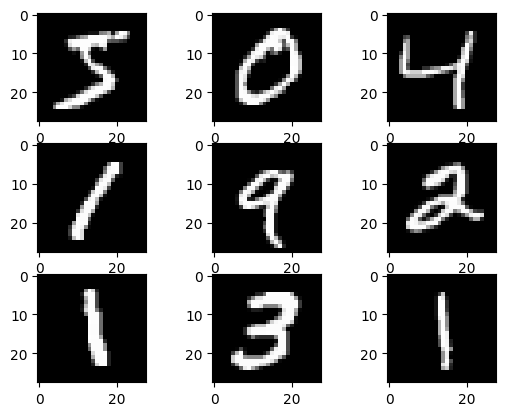

In [2]:
from tensorflow.keras.datasets import mnist  # type: ignore

from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data() #returns tuple pair, train x is images itself and other tuple is labels assosicated with them
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(3, 3, i + 1) #creates a grid of values for images to fill it up
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()


In [254]:
import tensorflow as tf
import torch 
import torch.nn.functional as F


In [255]:
mnist = tf.keras.datasets.mnist
(xdata, xdatalbl), (ydata, ydatalbl) = mnist.load_data()

In [256]:
ximg = torch.tensor(xdata)
yimg = torch.tensor(ydata)
xlab = torch.tensor(xdatalbl).long()
ylab = torch.tensor(ydatalbl)
yimg.isnan().any()


tensor(False)

In [257]:
ximg.shape

torch.Size([60000, 28, 28])

torch.Size([10000, 784])
10
tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])


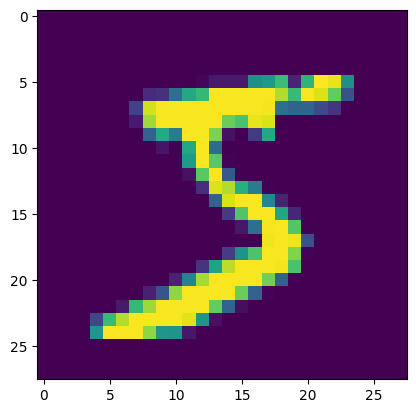

In [258]:
ximg = ximg.flatten(start_dim=1) / 255.0
yimg = yimg.flatten(start_dim=1) / 255.0
print(yimg.shape)
numc = len(set([xlab[i].item() for i in range(len(xlab))]))
print(numc)
xlabenc = F.one_hot(xlab, num_classes=numc)
print(xlabenc[:1])
plt.imshow(ximg[:1].reshape(28,28))


In [270]:
g = torch.Generator()
W = torch.randn(784, 10, requires_grad=True)

In [252]:
#for one single word
for _ in range(100):
    #forward pass
    test = ximg[:1].float() / 255.0
    target = xlabenc[:1]
    logits = test @ W
    prob = logits.exp()
    prob = prob / prob.sum(1, keepdim=True)
    loss = -prob[0, target.argmax()].log()
    print(f'{loss.item() = }')

    #backward pass
    W.grad = None
    loss.backward()

    #gradient descent
    W.data += -10 * W.grad



loss.item() = 2.232783794403076
loss.item() = 2.220348834991455
loss.item() = 2.207951307296753
loss.item() = 2.195591449737549
loss.item() = 2.183269739151001
loss.item() = 2.1709861755371094
loss.item() = 2.1587414741516113
loss.item() = 2.146535634994507
loss.item() = 2.134369134902954
loss.item() = 2.122241973876953
loss.item() = 2.110154628753662
loss.item() = 2.09810733795166
loss.item() = 2.0861003398895264
loss.item() = 2.074134111404419
loss.item() = 2.062208890914917
loss.item() = 2.0503246784210205
loss.item() = 2.0384819507598877
loss.item() = 2.0266811847686768
loss.item() = 2.0149223804473877
loss.item() = 2.0032055377960205
loss.item() = 1.9915316104888916
loss.item() = 1.9799002408981323
loss.item() = 1.968312382698059
loss.item() = 1.9567677974700928
loss.item() = 1.9452664852142334
loss.item() = 1.9338091611862183
loss.item() = 1.9223960638046265
loss.item() = 1.9110273122787476
loss.item() = 1.899703025817871
loss.item() = 1.8884235620498657
loss.item() = 1.877189159

In [277]:
#the whole logic less go
for _ in range(100):
    #forward pass
    logits = ximg @ W
    prob = logits.exp()
    prob = prob / prob.sum(1, keepdim=True)
    loss = -prob[torch.arange(prob.shape[0]), xlab].log().mean()
    print(loss.item())

    #backward pass
    W.grad = None
    loss.backward()

    #grad descent
    W.data += -0.1 * W.grad


2.272679090499878
2.265493154525757
2.2583718299865723
2.251314640045166
2.2443196773529053
2.23738694190979
2.230515718460083
2.2237045764923096
2.2169532775878906
2.2102608680725098
2.203627109527588
2.1970505714416504
2.190530776977539
2.1840670108795166
2.1776585578918457
2.171304702758789
2.1650052070617676
2.1587588787078857
2.1525650024414062
2.146423578262329
2.140333414077759
2.134294033050537
2.1283047199249268
2.1223652362823486
2.1164743900299072
2.1106321811676025
2.1048378944396973
2.099090576171875
2.0933899879455566
2.087735652923584
2.0821268558502197
2.0765631198883057
2.0710437297821045
2.065568447113037
2.0601367950439453
2.0547478199005127
2.0494015216827393
2.0440971851348877
2.0388343334198
2.0336124897003174
2.0284311771392822
2.0232901573181152
2.0181884765625
2.0131261348724365
2.0081024169921875
2.0031168460845947
1.9981693029403687
1.993259072303772
1.9883860349655151
1.9835494756698608
1.9787489175796509
1.9739844799041748
1.9692550897598267
1.9645608663558

In [280]:
logits = yimg @ W
print(logits.shape)
prob = logits.exp()
prob = prob / prob.sum(1, keepdim=True)
accuracy = (prob.argmax(1) == ylab).float().mean()
print(accuracy.item())

torch.Size([10000, 10])
0.6858999729156494
